# Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
warnings.filterwarnings("ignore", category=FutureWarning)

## Load data from file

In [2]:
df = pd.read_csv('auto.csv')
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


## Split data into training and testing set

In [3]:
X = df[['displ', 'size']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Initialize DecisionTree for classification

In [4]:
reg = DecisionTreeRegressor()
parameters = {
    'max_depth': 10,
    'min_samples_leaf': 0.1,
    'random_state': 1
}
reg.set_params(**parameters)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

## Fit model and predict

In [5]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred[:10]

array([19.3245614 , 19.3245614 , 15.34418605, 31.54705882, 19.3245614 ,
       26.33777778, 14.2       , 19.3245614 , 15.34418605, 32.85142857])

## Visualize model

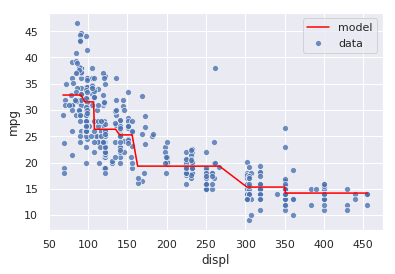

In [6]:
sns.set()
sns.scatterplot(X['displ'], y, alpha=0.8, label='data')
sns.lineplot(np.array(X['displ']), reg.predict(X), color='red', label='model', sort=True)

## Evaluate model

In [7]:
rmse = MSE(y_test, y_pred) ** 0.5
print("Root of mean squared error: {:.2f}".format(rmse))

Root of mean squared error: 4.18


In [8]:
MSE_cv = - cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
print("Root of mean squared error: {:.2f}".format(np.mean(MSE_cv) ** 0.5))

Root of mean squared error: 4.51
